**About this notebook**

This notebook fine-tunes the VGG16 model.  The codes were largely based on Chapter 5 of this book:

https://www.manning.com/books/deep-learning-with-python

### - create batches of augmented images

In [16]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

#validation data should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 2567 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


### - download pre-trained  VGG16 model

In [22]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [23]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [24]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 21,138,757
Non-trainable params: 0
_________________________________________________________________


### - freeze layers and set specific ones for training

In [26]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [27]:
model.compile(loss='categorical_crossentropy',
                      optimizer=optimizers.Adam(lr=1e-5),
                      metrics=['acc'])

In [28]:
history = model.fit_generator(
              train_generator,
              steps_per_epoch=81,
              epochs=100,
              validation_data=validation_generator,
              validation_steps=23)

Epoch 1/100
81/81 [==============================] - 45s 550ms/step - loss: 1.2485 - acc: 0.4945 - val_loss: 0.7769 - val_acc: 0.7250
Epoch 2/100
81/81 [==============================] - 40s 497ms/step - loss: 0.7218 - acc: 0.7287 - val_loss: 0.5746 - val_acc: 0.7921
Epoch 3/100
81/81 [==============================] - 40s 496ms/step - loss: 0.5700 - acc: 0.7851 - val_loss: 0.4730 - val_acc: 0.8331
Epoch 4/100
81/81 [==============================] - 40s 494ms/step - loss: 0.4654 - acc: 0.8310 - val_loss: 0.4070 - val_acc: 0.8646
Epoch 5/100
81/81 [==============================] - 40s 498ms/step - loss: 0.4199 - acc: 0.8402 - val_loss: 0.3912 - val_acc: 0.8700
Epoch 6/100
81/81 [==============================] - 41s 510ms/step - loss: 0.3865 - acc: 0.8588 - val_loss: 0.4057 - val_acc: 0.8673
Epoch 7/100
81/81 [==============================] - 40s 494ms/step - loss: 0.3586 - acc: 0.8650 - val_loss: 0.3495 - val_acc: 0.8892
Epoch 8/100
81/81 [==============================] - 40s 495ms

Epoch 62/100
81/81 [==============================] - 40s 495ms/step - loss: 0.0328 - acc: 0.9900 - val_loss: 0.3376 - val_acc: 0.9124
Epoch 63/100
81/81 [==============================] - 41s 501ms/step - loss: 0.0232 - acc: 0.9934 - val_loss: 0.3502 - val_acc: 0.9166
Epoch 64/100
81/81 [==============================] - 41s 502ms/step - loss: 0.0169 - acc: 0.9969 - val_loss: 0.3450 - val_acc: 0.9234
Epoch 65/100
81/81 [==============================] - 40s 495ms/step - loss: 0.0256 - acc: 0.9907 - val_loss: 0.3637 - val_acc: 0.9124
Epoch 66/100
81/81 [==============================] - 41s 502ms/step - loss: 0.0207 - acc: 0.9938 - val_loss: 0.3237 - val_acc: 0.9138
Epoch 67/100
81/81 [==============================] - 41s 502ms/step - loss: 0.0296 - acc: 0.9915 - val_loss: 0.3876 - val_acc: 0.9029
Epoch 68/100
81/81 [==============================] - 41s 501ms/step - loss: 0.0176 - acc: 0.9969 - val_loss: 0.4035 - val_acc: 0.9042
Epoch 69/100
81/81 [==============================] - 4

### - smooth the plots

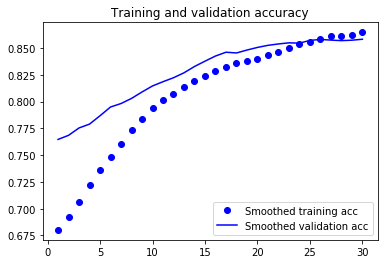

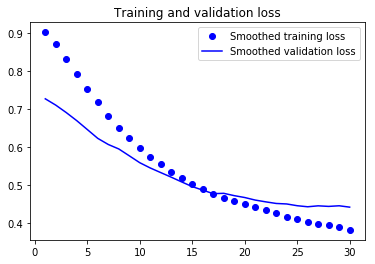

In [29]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
              smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
#Evaluate model
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 372 images belonging to 5 classes.
test acc: 0.9072164946917406


In [31]:
model.save('vgg16_3.h5')